In [1]:
!pip install prophet

In [1]:
import numpy as np
import pandas as pd
from prophet import Prophet

C:\Users\shalu\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_excel("SALESBYAMOUNTCONSOLIDATED.xlsx")

In [5]:
df.head(3)

,Source.Name,Inv.Date,SALES AMOUNT
0,1 Jan 2023.xlsx,2023-01-02,618005.76
1,1 Jan 2023.xlsx,2023-01-02,618005.76
2,1 Jan 2023.xlsx,2023-01-02,618005.76


In [6]:
df['Inv.Date']=pd.to_datetime(df["Inv.Date"])

In [7]:
df=df.drop(columns=["Source.Name"])

## The inputs to prophet are two columns : date and the value, extra columns can be added using add_regressor

In [8]:
df

,Inv.Date,SALES AMOUNT
0,2023-01-02,618005.76
1,2023-01-02,618005.76
2,2023-01-02,618005.76
3,2023-01-02,618005.76
4,2023-01-02,618005.76
...,...,...
894168,2021-09-29,145230.80
894169,2021-09-29,281524.32
894170,2021-09-29,140762.16
894171,2021-09-28,3090.00


In [9]:
df.isnull().sum()


Inv.Date        0
SALES AMOUNT    1
dtype: int64

In [10]:
df=df.fillna("44997")

## The columns must be in the names : ds, y

In [11]:
df=df.rename(columns={"Inv.Date":"ds","SALES AMOUNT":"y"})

In [12]:
m=Prophet()

In [13]:
m.fit(df)

16:05:44 - cmdstanpy - INFO - Chain [1] start processing
16:08:17 - cmdstanpy - INFO - Chain [1] done processing


## Create a dataframe for the future data

In [14]:
future=m.make_future_dataframe(periods=365)

In [15]:
future.tail()

,ds
1693,2025-12-27
1694,2025-12-28
1695,2025-12-29
1696,2025-12-30
1697,2025-12-31


## Make predictions for future

In [16]:
forecast=m.predict(future)

In [17]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1693,2025-12-27,113674.568261,-229969.094001,449551.344593,54578.187242,171083.834590,-8225.830529,-8225.830529,-8225.830529,1207.335508,1207.335508,1207.335508,-9433.166037,-9433.166037,-9433.166037,0.0,0.0,0.0,105448.737733
1694,2025-12-28,113697.259530,-213295.845010,495301.365791,54221.746115,171408.019463,18803.243528,18803.243528,18803.243528,27320.510835,27320.510835,27320.510835,-8517.267307,-8517.267307,-8517.267307,0.0,0.0,0.0,132500.503058
1695,2025-12-29,113719.950799,-259952.314025,424859.121407,53973.250572,171811.253449,-14293.092234,-14293.092234,-14293.092234,-6685.804039,-6685.804039,-6685.804039,-7607.288195,-7607.288195,-7607.288195,0.0,0.0,0.0,99426.858565
1696,2025-12-30,113742.642067,-227244.622298,448688.259560,53800.784309,172128.597252,-12698.400734,-12698.400734,-12698.400734,-5978.693949,-5978.693949,-5978.693949,-6719.706785,-6719.706785,-6719.706785,0.0,0.0,0.0,101044.241334
1697,2025-12-31,113765.333336,-241376.478918,456458.117632,53631.932002,172323.375889,-8094.228388,-8094.228388,-8094.228388,-2224.187149,-2224.187149,-2224.187149,-5870.041239,-5870.041239,-5870.041239,0.0,0.0,0.0,105671.104948


## Visualise the predicted data

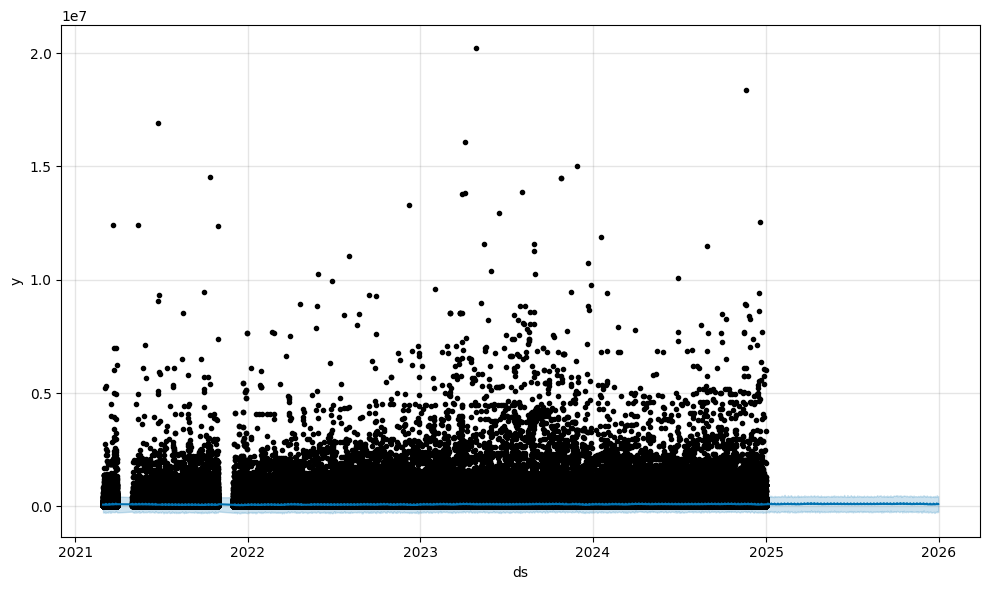

In [18]:
chart=m.plot(forecast)

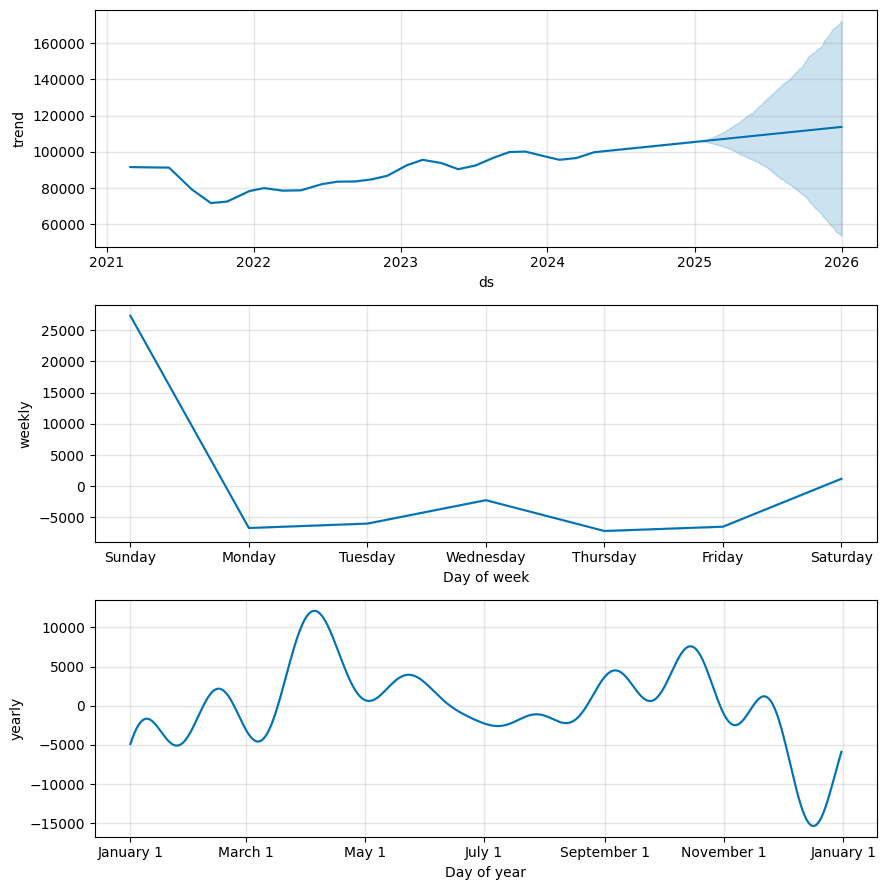

In [19]:
fig2 = m.plot_components(forecast)